In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


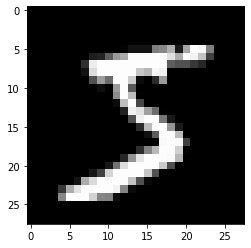

5


In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [5]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [8]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.8654 - accuracy: 0.7801 - val_loss: 0.1307 - val_accuracy: 0.9630
Epoch 2/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2703 - accuracy: 0.9201 - val_loss: 0.0750 - val_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2055 - accuracy: 0.9385 - val_loss: 0.0746 - val_accuracy: 0.9772
